Accuracy: 0.88
Recall: 1.00
F1 Score: 0.87
AUC-ROC Score: 0.89


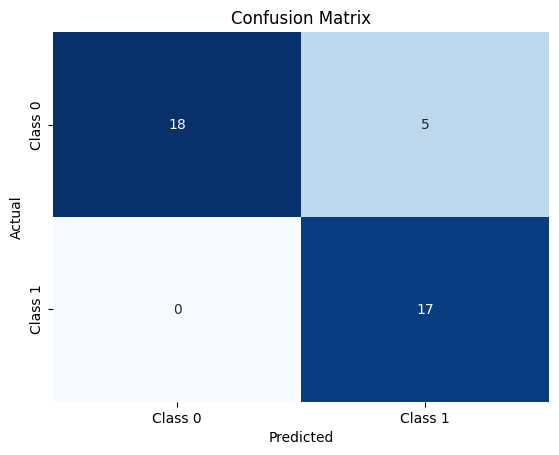

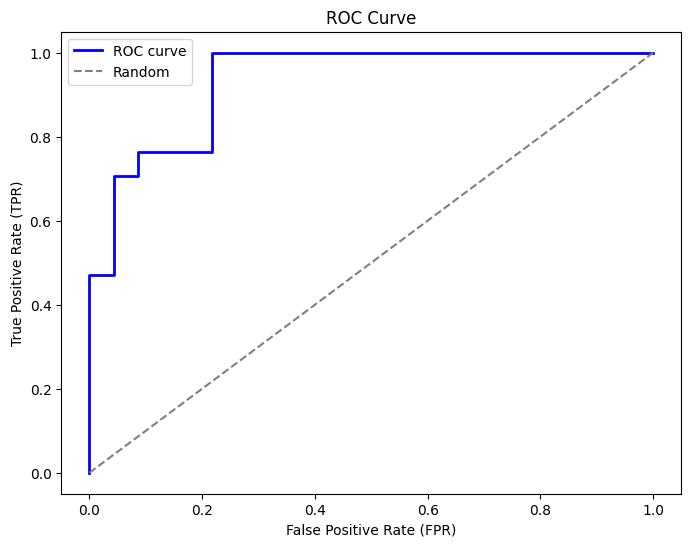

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('classification_dataset.csv')

train_data, test_data, train_labels, test_labels = train_test_split(
    data.drop('Target', axis=1),  
    data['Target'],  
    test_size=0.2,
    random_state=42
)

model = LogisticRegression()
model.fit(train_data, train_labels)

predictions = model.predict(test_data)

accuracy = accuracy_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
roc_auc = roc_auc_score(test_labels, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')

conf_matrix = confusion_matrix(test_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

proba_positive_class = model.predict_proba(test_data)[:, 1]

fpr, tpr, thresholds = roc_curve(test_labels, proba_positive_class)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("multiclass_dataset.csv")

X = data[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6']]
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

y_pred_mlp = mlp_classifier.predict(X_test)

print("\nNeural Network Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Random Forest Classifier:
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.75      0.38      0.50         8
           2       0.79      0.79      0.79        14
           3       0.77      0.91      0.83        11

    accuracy                           0.70        40
   macro avg       0.69      0.66      0.65        40
weighted avg       0.71      0.70      0.69        40

Confusion Matrix:
 [[ 4  1  2  0]
 [ 4  3  0  1]
 [ 1  0 11  2]
 [ 0  0  1 10]]

Neural Network Classifier:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.71      0.62      0.67         8
           2       0.83      0.71      0.77        14
           3       0.83      0.91      0.87        11

    accuracy                           0.75        40
   macro avg       0.73     

Metrics for Label1:
Accuracy: 0.75
Recall: 0.3333333333333333
Precision: 0.42857142857142855
F1-Score: 0.375


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


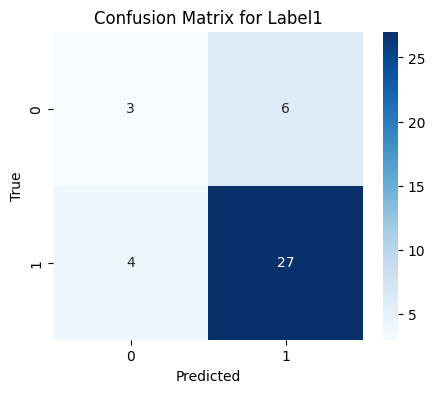

Metrics for Label2:
Accuracy: 0.85
Recall: 0.9523809523809523
Precision: 0.8
F1-Score: 0.8695652173913043


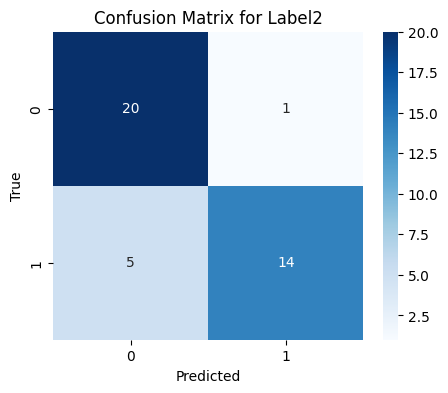

Metrics for Label3:
Accuracy: 0.775
Recall: 0.7894736842105263
Precision: 0.75
F1-Score: 0.7692307692307692


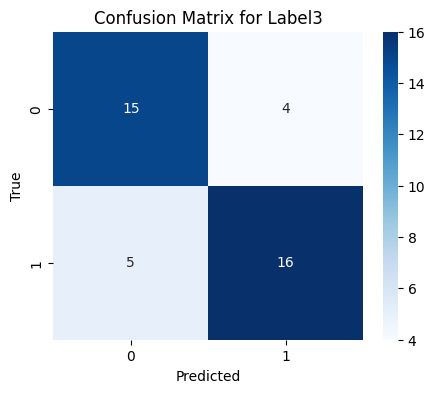

Metrics for Label4:
Accuracy: 0.725
Recall: 0.6363636363636364
Precision: 0.8235294117647058
F1-Score: 0.717948717948718


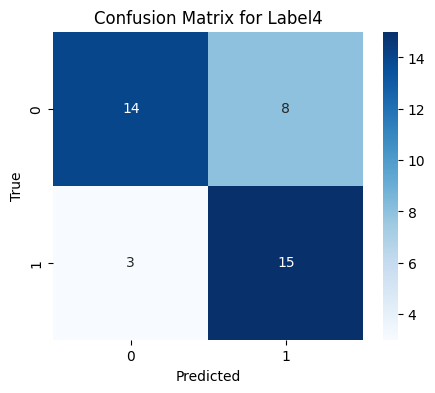

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, multilabel_confusion_matrix

# Завантаження даних
data = pd.read_csv("multilabel_dataset.csv")

# Розділення на ознаки та мультилейбли
X = data.drop(columns=['Label1', 'Label2', 'Label3', 'Label4'])
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання багатошарової нейронної мережі
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Оцінка результатів
y_pred = mlp_classifier.predict(X_test)

# Візуалізація матриць плутанини та інших метрик для кожного лейбла
for label in y.columns:
    confusion_matrix = multilabel_confusion_matrix(y_test[label], y_pred[:, y.columns.get_loc(label)])

    print(f"Metrics for {label}:")
    accuracy = accuracy_score(y_test[label], y_pred[:, y.columns.get_loc(label)])
    recall = recall_score(y_test[label], y_pred[:, y.columns.get_loc(label)])
    precision = precision_score(y_test[label], y_pred[:, y.columns.get_loc(label)])
    f1 = f1_score(y_test[label], y_pred[:, y.columns.get_loc(label)])

    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1-Score: {f1}")

    # Візуалізація матриці плутанини
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix[0], annot=True, fmt='g', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
